In [340]:
import pandas as pd
import numpy as np
import random as rnd

def titanic(train, test):
    train_df = pd.read_csv(train)
    test_df = pd.read_csv(test)
    combine = [train_df, test_df]

    train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
    test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
    combine = [train_df, test_df]

    for dataset in combine:
        dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

    pd.crosstab(train_df['Title'], train_df['Sex'])

    for dataset in combine:
        dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
        'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

        dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
        dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
        dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

    train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

    title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
    for dataset in combine:
        dataset['Title'] = dataset['Title'].map(title_mapping)
        dataset['Title'] = dataset['Title'].fillna(0)

    train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
    test_df = test_df.drop(['Name'], axis=1)
    combine = [train_df, test_df]

    for dataset in combine:
        dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

    guess_ages = np.zeros((2,3))
    guess_ages

    for dataset in combine:
        for i in range(0, 2):
            for j in range(0, 3):
                guess_df = dataset[(dataset['Sex'] == i) & \
                                      (dataset['Pclass'] == j+1)]['Age'].dropna()

                # age_mean = guess_df.mean()
                # age_std = guess_df.std()
                # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

                age_guess = guess_df.median()

                # Convert random age float to nearest .5 age
                guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5

        for i in range(0, 2):
            for j in range(0, 3):
                dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                        'Age'] = guess_ages[i,j]

        dataset['Age'] = dataset['Age'].astype(int)

    for dataset in combine:
        dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1



    for dataset in combine:
        dataset['IsAlone'] = 0
        dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

    combine = [train_df, test_df]

    freq_port = train_df.Embarked.dropna().mode()[0]

    for dataset in combine:
        dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)

    test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
    
    test_df = pd.get_dummies(test_df)
    train_df = pd.get_dummies(train_df)

    test_df.head(10)
    return (train_df, test_df)

In [341]:
train = './titanic/train.csv'
test = './titanic/test.csv'
train, test = titanic(train, test)
train.head()



,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Title,FamilySize,IsAlone,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,22,1,0,7.2500,1,2,0,0,0,1
1,1,1,1,38,1,0,71.2833,3,2,0,1,0,0
2,1,3,1,26,0,0,7.9250,2,1,1,0,0,1
3,1,1,1,35,1,0,53.1000,3,2,0,0,0,1
4,0,3,0,35,0,0,8.0500,1,1,1,0,0,1


In [342]:
target = test.iloc[:, 1:]

In [372]:


X = train.iloc[:, 1:]

# x contains of features

y = train.iloc[:, 0]

# y is the target

In [373]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline



In [374]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

In [361]:


X = train.iloc[:, 1:]

# x contains of features

y = train.iloc[:, 0]

# y is the target

In [362]:
#plot mean scores for a particular grid object
def hp_cv_scores(grid_obj):
    grid_obj.cv_results_
    mean_test_scores = grid_obj.cv_results_['mean_test_score']
    mean_train_scores = grid_obj.cv_results_['mean_train_score']
    plt.figure(figsize=(10,6))
    
    param_values =[str(x) for x in grid_obj.param_grid.values()[0]]
    x = np.arange(1, len(param_values)+1)
    
    plt.plot(x,mean_train_scores,c='r')
    plt.xticks(x,param_values)
    plt.plot(x,mean_test_scores,c='g')
    plt.xlabel(grid_obj.param_grid.keys()[0])
    plt.ylabel('mean scores')
    plt.show()

In [363]:
parameter = {'n_estimators': [2, 4, 8, 16], 
              'max_features': ['log2'], 
              'criterion': ['gini'],
              'max_depth': 4, 
              'min_samples_split': [5, 30],
              'min_samples_leaf': [1]
             }

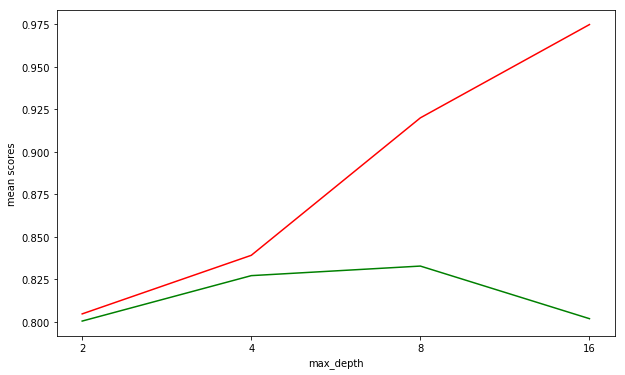

In [379]:
grid = gridfunc(classifier,{'max_depth': [2,4,8,16]} , X_train, y_train)

hp_cv_scores(grid)

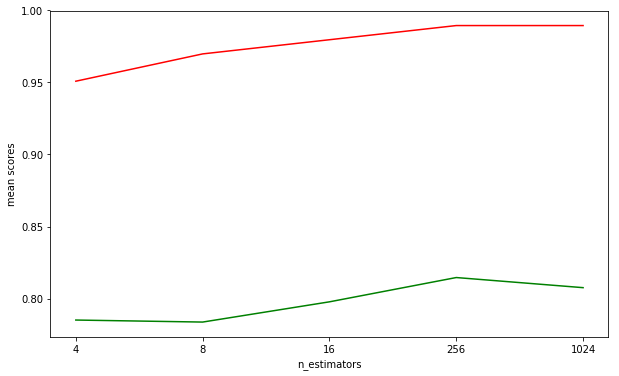

In [380]:
grid = gridfunc(classifier,{'n_estimators': [4,8,16,256,1024]} , X, y)

hp_cv_scores(grid)

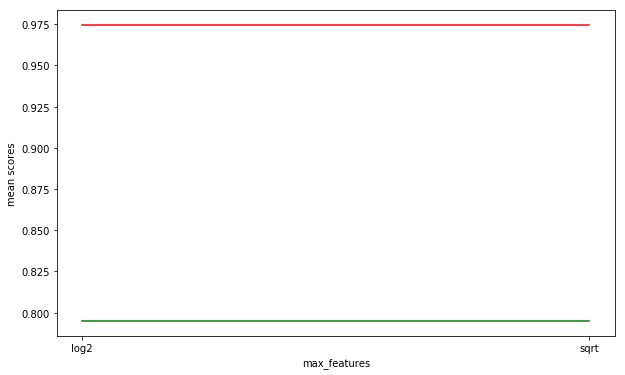

In [381]:
grid = gridfunc(classifier,{'max_features': ['log2', 'sqrt']} , X, y)

hp_cv_scores(grid)

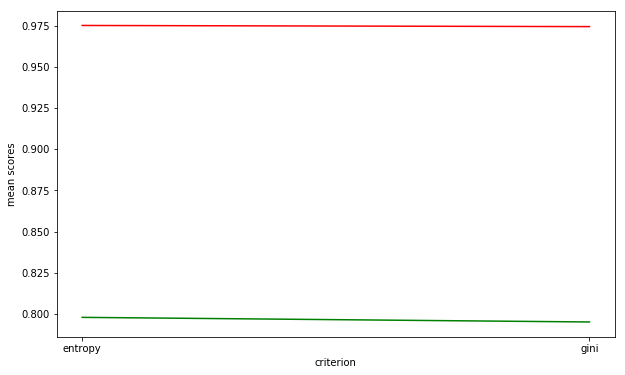

In [382]:
grid = gridfunc(classifier,{'criterion': ['entropy', 'gini']} , X, y)

hp_cv_scores(grid)

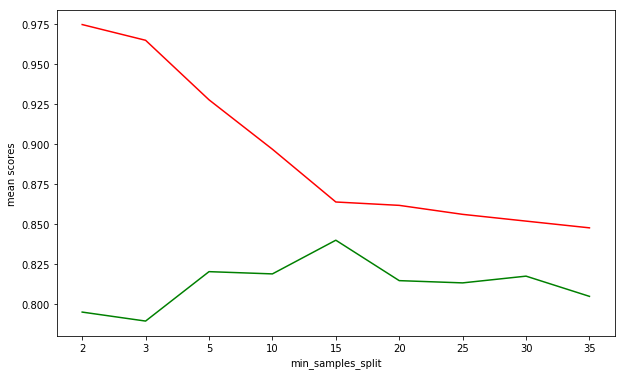

In [383]:
grid = gridfunc(classifier,{'min_samples_split': [2, 3, 5, 10, 15,20,25,30,35]} , X, y)

hp_cv_scores(grid)

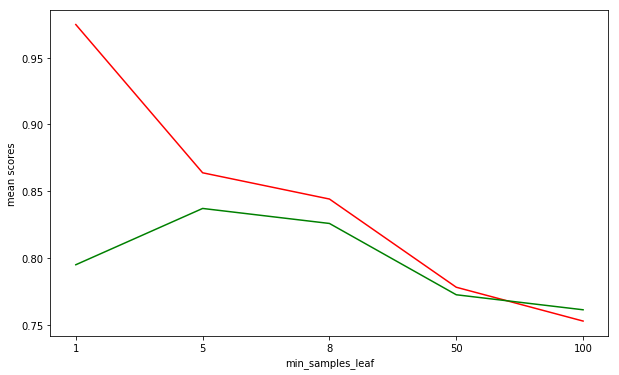

In [384]:
grid = gridfunc(classifier,{'min_samples_leaf': [1,5,8,50,100]} , X, y)

hp_cv_scores(grid)

In [386]:
##final tuned parameters

In [375]:
def gridfunc(classifier, parameter, X_t, Y_t):
    
    
    clf = classifier
    
    parameters = parameter
    acc_scorer = make_scorer(accuracy_score)
    
    # Run the grid search
    grid_obj = GridSearchCV(clf, parameters, scoring=acc_scorer)
    grid_obj = grid_obj.fit(X_train, y_train)
    
    return grid_obj



In [376]:
classifier = RandomForestClassifier(oob_score=True, random_state=0)


parameter = {'n_estimators': [4, 16], 
              'max_features': ['log2'], 
              'criterion': ['gini'],
              'max_depth': [4, 5], 
              'min_samples_split': [5, 30],
              'min_samples_leaf': [1]
             }


In [ ]:
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.cross_validation import StratifiedKFold

In [ ]:
# def gridfunc(classifier, parameter, X_t, Y_t):
    
    
#     clf = classifier
    
#     parameters = parameter
#     acc_scorer = make_scorer(accuracy_score)
    
    
#     cross_validation = StratifiedKFold(y, n_folds=5)
    
#     # Run the grid search
#     grid_obj = GridSearchCV(clf, parameters, scoring=acc_scorer, cv=cross_validation)
   
#     grid_obj = GridSearchCV(clf, parameters, scoring=acc_scorer)
#     grid_obj = grid_obj.fit(X, y)
    
#     return grid_obj



In [377]:
grid = gridfunc(classifier, parameter, X, y)

grid.cv_results_

{'mean_fit_time': array([ 0.01471734,  0.04081202,  0.01144107,  0.04163726,  0.0114727 ,
         0.04043531,  0.01122602,  0.0416774 ]),
 'mean_score_time': array([ 0.00357366,  0.00926407,  0.00252032,  0.00859968,  0.00254965,
         0.00885566,  0.00249505,  0.00861692]),
 'mean_test_score': array([ 0.81039326,  0.82724719,  0.81460674,  0.82022472,  0.7991573 ,
         0.8244382 ,  0.81179775,  0.82162921]),
 'mean_train_score': array([ 0.83638561,  0.84129643,  0.83214847,  0.83357267,  0.85602595,
         0.86026014,  0.83075087,  0.84340023]),
 'param_criterion': masked_array(data = ['gini' 'gini' 'gini' 'gini' 'gini' 'gini' 'gini' 'gini'],
              mask = [False False False False False False False False],
        fill_value = ?),
 'param_max_depth': masked_array(data = [4 4 4 4 5 5 5 5],
              mask = [False False False False False False False False],
        fill_value = ?),
 'param_max_features': masked_array(data = ['log2' 'log2' 'log2' 'log2' 'log2' 'log2'

In [378]:
 # Set the clf to the best combination of parameters
clf = grid.best_estimator_
    
    # Fit the best algorithm to the data. 
clf.fit(X_train, y_train)
    
    

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='log2', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=5, min_weight_fraction_leaf=0.0,
            n_estimators=16, n_jobs=1, oob_score=True, random_state=0,
            verbose=0, warm_start=False)

In [350]:

from sklearn.model_selection import RandomizedSearchCV

In [351]:
# def gridfunc(classifier, parameter, X_t, Y_t):
    
    
#     clf = classifier
    
#     parameters = parameter
#     acc_scorer = make_scorer(accuracy_score)
    
#     n_iter_search = 20
#     # Run the grid search
#     grid_obj = RandomizedSearchCV(clf, param_distributions=param_dist, n_iter=n_iter_search)
#     grid_obj = grid_obj.fit(X, y)
    
#     return grid_obj



In [352]:
# classifier = RandomForestClassifier()


# param_dist = {"max_depth": [3, None],
#               "max_features": [1, 2, 4, 5],
#               "min_samples_split": [5, 30],
#               "min_samples_leaf": [1, 2, 4, 5],
#               "bootstrap": [True, False],
#               "criterion": ["gini", "entropy"]}


In [353]:
# grid = gridfunc(classifier, parameter, X, y)

# grid.cv_results_

In [354]:
#  # Set the clf to the best combination of parameters
# clf = grid.best_estimator_
    
#     # Fit the best algorithm to the data. 
# clf.fit(X_train, y_train)
    
    

In [355]:
y_predict = clf.predict(X_test)
y_predict

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1])

In [356]:
y_predict.shape

(179,)

In [385]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict


accuracy_score(y_test, y_predict)

0.8044692737430168